In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import pretreat_data

# Path to the data
train_path = "./data/ClimateTrain.csv"
test_path = "./data/ClimateTest.csv"

# Read as pandas dataframe and transform dates to datetime
train_df = pd.read_csv(train_path)
train_df['date'] = pd.to_datetime(train_df['date'])

test_df = pd.read_csv(test_path)
test_df['date'] = pd.to_datetime(test_df['date'])

# Plot description
train_df.describe()
test_df.describe()

,date,meantemp,humidity,wind_speed,meanpressure
count,114,114.000000,114.000000,114.000000,114.000000
mean,2017-02-26 12:00:00,21.713079,56.258362,8.143924,1004.035090
min,2017-01-01 00:00:00,11.000000,17.750000,1.387500,59.000000
25%,2017-01-29 06:00:00,16.437198,39.625000,5.563542,1007.437500
50%,2017-02-26 12:00:00,19.875000,57.750000,8.069444,1012.739316
75%,2017-03-26 18:00:00,27.705357,71.902778,10.068750,1016.739583
max,2017-04-24 00:00:00,34.500000,95.833333,19.314286,1022.809524
std,NaN,6.360072,19.068083,3.588049,89.474692


## Pretreat the data

In [161]:
train_df, test_df = pretreat_data(train_df, test_df)

Pre-treating data...


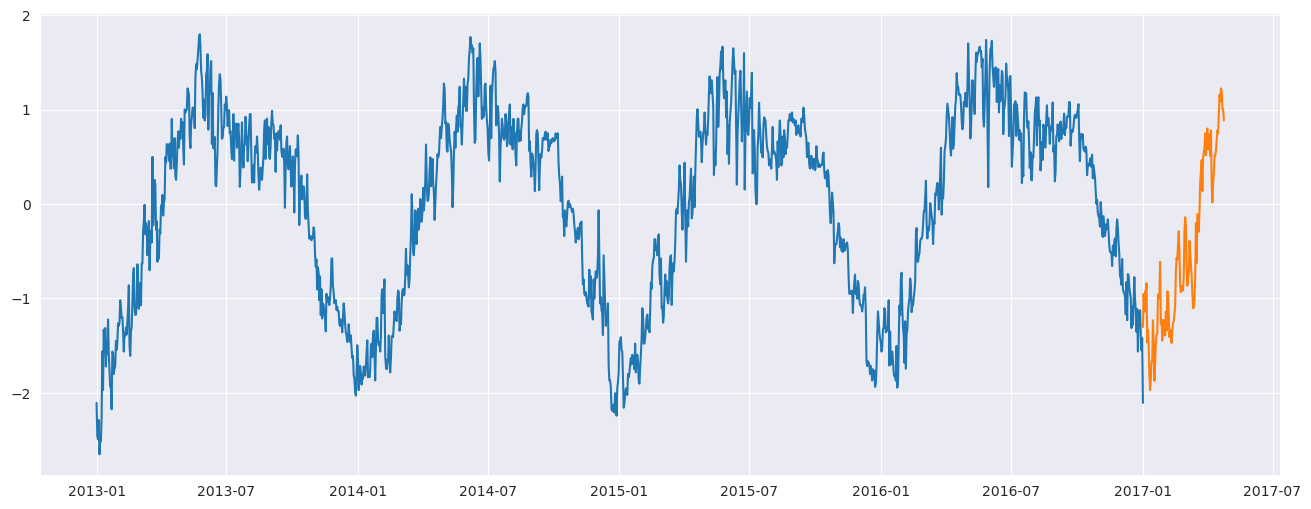

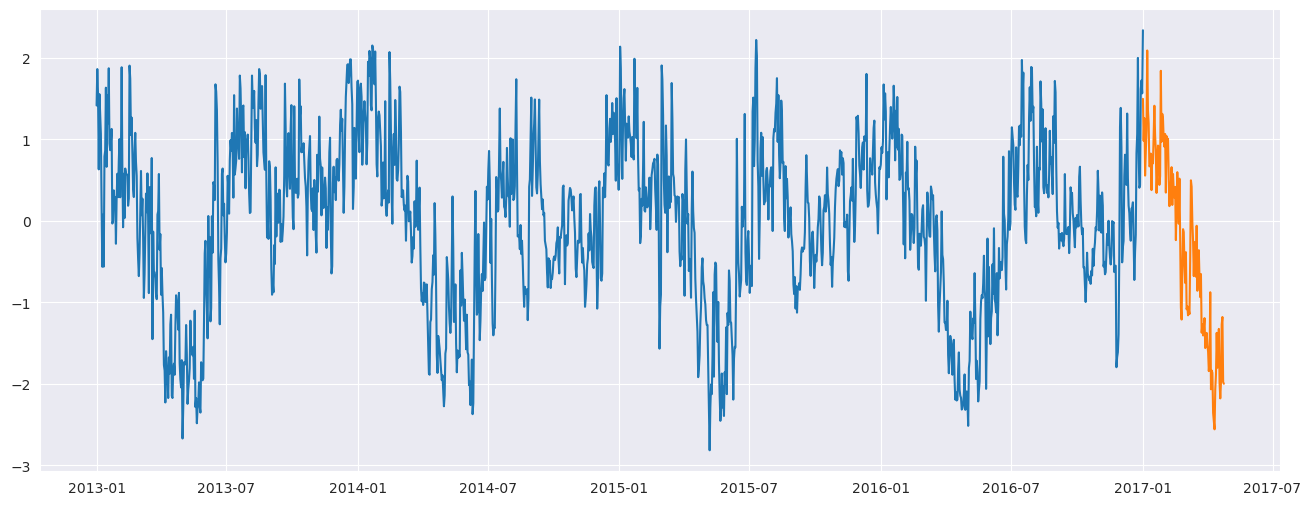

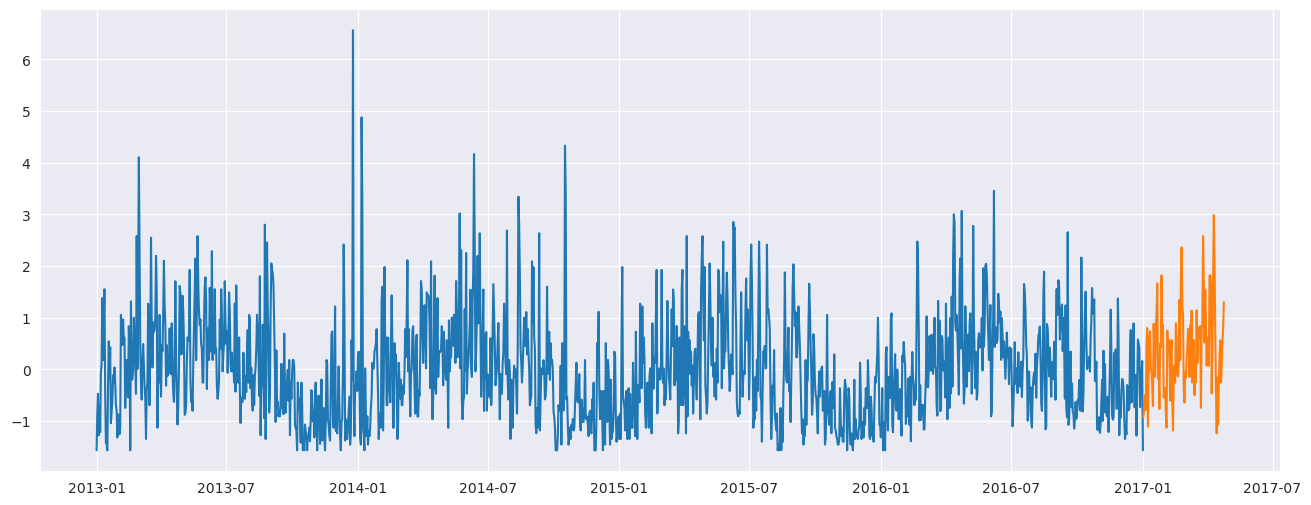

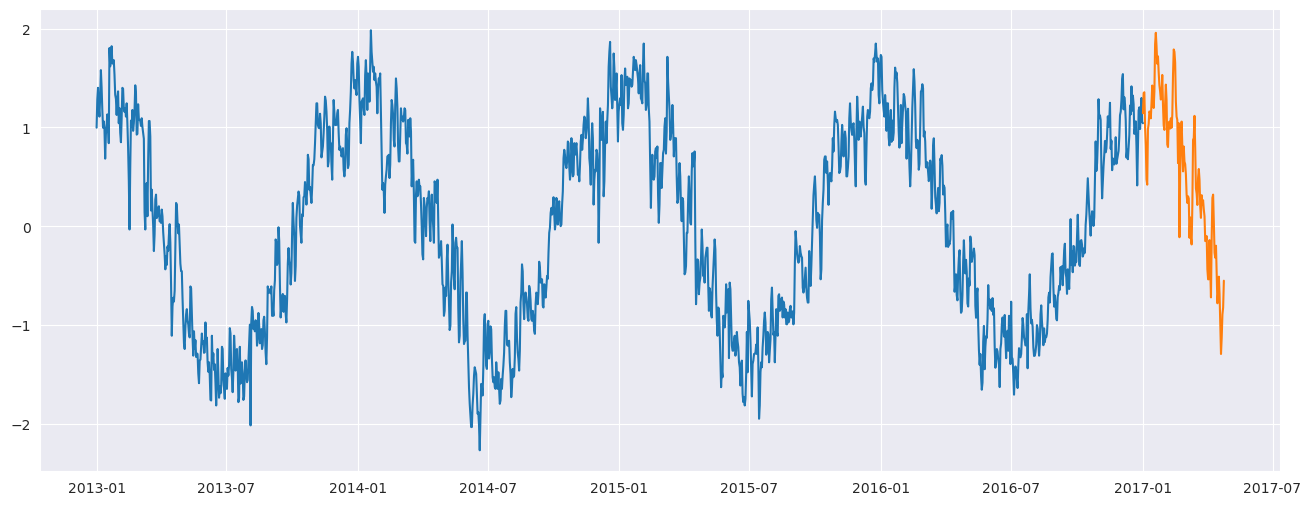

In [162]:
for col in train_df.columns[1:]:
    plt.figure(figsize=(16,6))
    plt.plot(train_df["date"], train_df[col])
    plt.plot(test_df["date"], test_df[col])
    

In [167]:

def rolling_train_valid_split(df, X=1):
    """
    Creates rolling train-validation splits for time-series data.
    
    Args:
        df (pd.DataFrame): Dataset with a "date" column.
        X (int): Number of months to include in the validation set (e.g., 1 = 1 month, 3 = 3 months).
    
    Yields:
        train (pd.DataFrame): Training dataset (1 year's worth of data).
        valid (pd.DataFrame): Validation dataset (X months starting in January of the next year).
    """
    df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is datetime
    start_date = df['date'].iloc[0]
    end_date = df['date'].iloc[-1]
    
    # Loop through each year in the data
    for year in range(start_date.year, end_date.year):
        # Define training range: from January 1st of the current year to December 31st of the same year
        train_start_date = pd.Timestamp(f"{year}-01-01")
        train_end_date = pd.Timestamp(f"{year}-12-31")
        train = df[(df['date'] >= train_start_date) & (df['date'] <= train_end_date)]
        
        # Define validation range: from January 1st of the next year to the end of X months
        valid_start_date = pd.Timestamp(f"{year + 1}-01-01")
        valid_end_date = valid_start_date + pd.offsets.MonthEnd(X - 1)
        valid = df[(df['date'] >= valid_start_date) & (df['date'] <= valid_end_date)]
        
        # Stop if there isn't enough validation data
        if valid.empty:
            break
        
        yield train, valid
        
rolling_train_valid_split(train_df)

<generator object rolling_train_valid_split at 0x7e19be4a3810>

In [168]:
# Generate rolling train-validation splits
for i, (train, valid) in enumerate(rolling_train_valid_split(train_df, X=7)):
    print(f"Fold {i + 1}:")
    print(f"Train period: {train['date'].min()} to {train['date'].max()}")
    print(f"Valid period: {valid['date'].min()} to {valid['date'].max()}")
    print("-" * 50)

Fold 1:
Train period: 2013-01-01 00:00:00 to 2013-12-31 00:00:00
Valid period: 2014-01-01 00:00:00 to 2014-06-30 00:00:00
--------------------------------------------------
Fold 2:
Train period: 2014-01-01 00:00:00 to 2014-12-31 00:00:00
Valid period: 2015-01-01 00:00:00 to 2015-06-30 00:00:00
--------------------------------------------------
Fold 3:
Train period: 2015-01-01 00:00:00 to 2015-12-31 00:00:00
Valid period: 2016-01-01 00:00:00 to 2016-06-30 00:00:00
--------------------------------------------------
Fold 4:
Train period: 2016-01-01 00:00:00 to 2016-12-31 00:00:00
Valid period: 2017-01-01 00:00:00 to 2017-01-01 00:00:00
--------------------------------------------------
